In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns

In [18]:
# Load dataset
df = pd.read_csv("mxmh_survey_results.csv")

In [37]:
# Handle missing values
df.fillna(0, inplace=True)

#Filter
df = df[(df.BPM < 500) & (df.BPM > 20)]

# Ensure Age is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

genres = ['Classical', 'EDM', 'Hip hop', 'Rock', 'Pop']
mental_health_conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']


# Rename Colums for better readability
df.rename(columns={
    'Frequency [Classical]': 'Classical',
    'Frequency [EDM]': 'EDM',
    'Frequency [Hip hop]': 'Hip hop',
    'Frequency [Rock]': 'Rock',
    'Frequency [Pop]': 'Pop'
}, inplace=True)

frequency_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Frequently": 3,
    "Very frequently": 4
}

#  Handle Na cases
for genre in ['Classical', 'EDM', 'Hip hop', 'Rock', 'Pop']:
    df[genre] = df[genre].map(frequency_mapping).fillna(0)


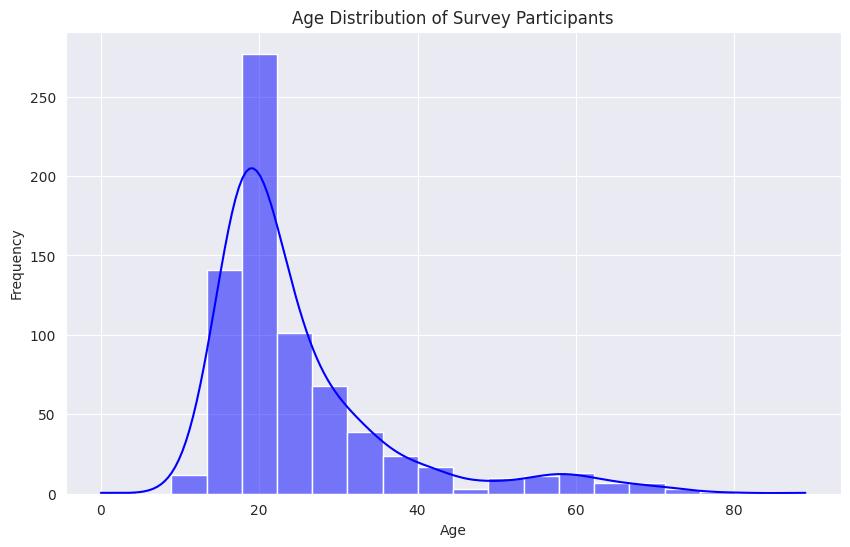

In [5]:

# Plot 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Survey Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

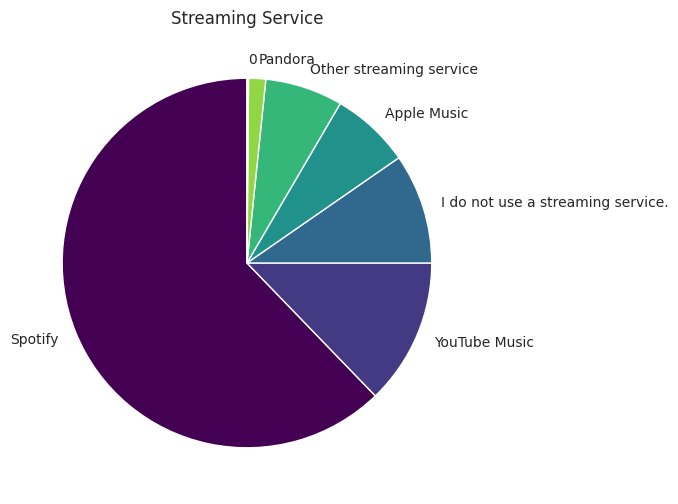

In [6]:

# Plot 2: Primary Streaming Service Usage
plt.figure(figsize=(10, 6))
df['Primary streaming service'].value_counts().plot(kind='pie',
    startangle=90,
    colormap='viridis')
plt.title('Streaming Service')
plt.ylabel('')
plt.show()

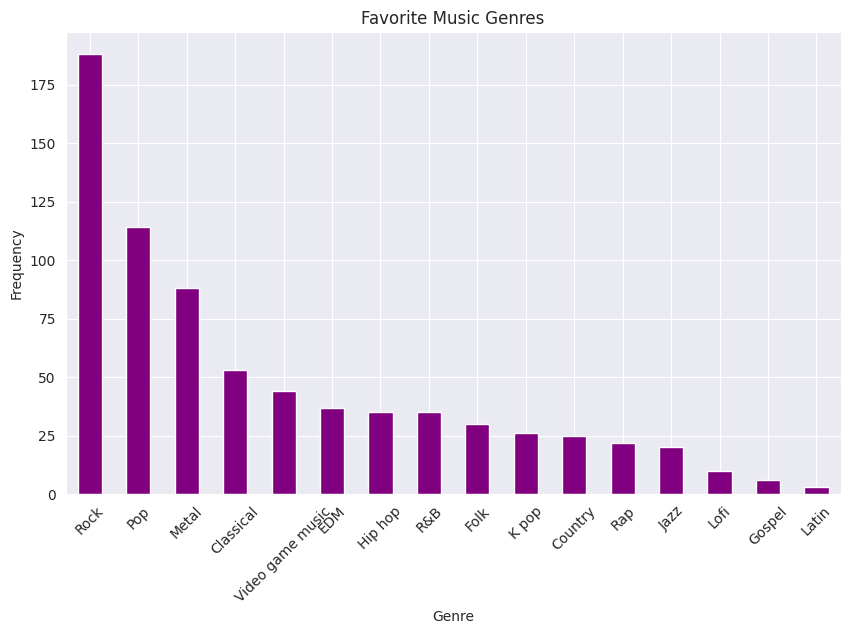

In [7]:

# Plot 3: Favorite Genre Distribution
plt.figure(figsize=(10, 6))
df['Fav genre'].value_counts().plot(kind='bar', color='purple')
plt.title('Favorite Music Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Streaming services by Age')

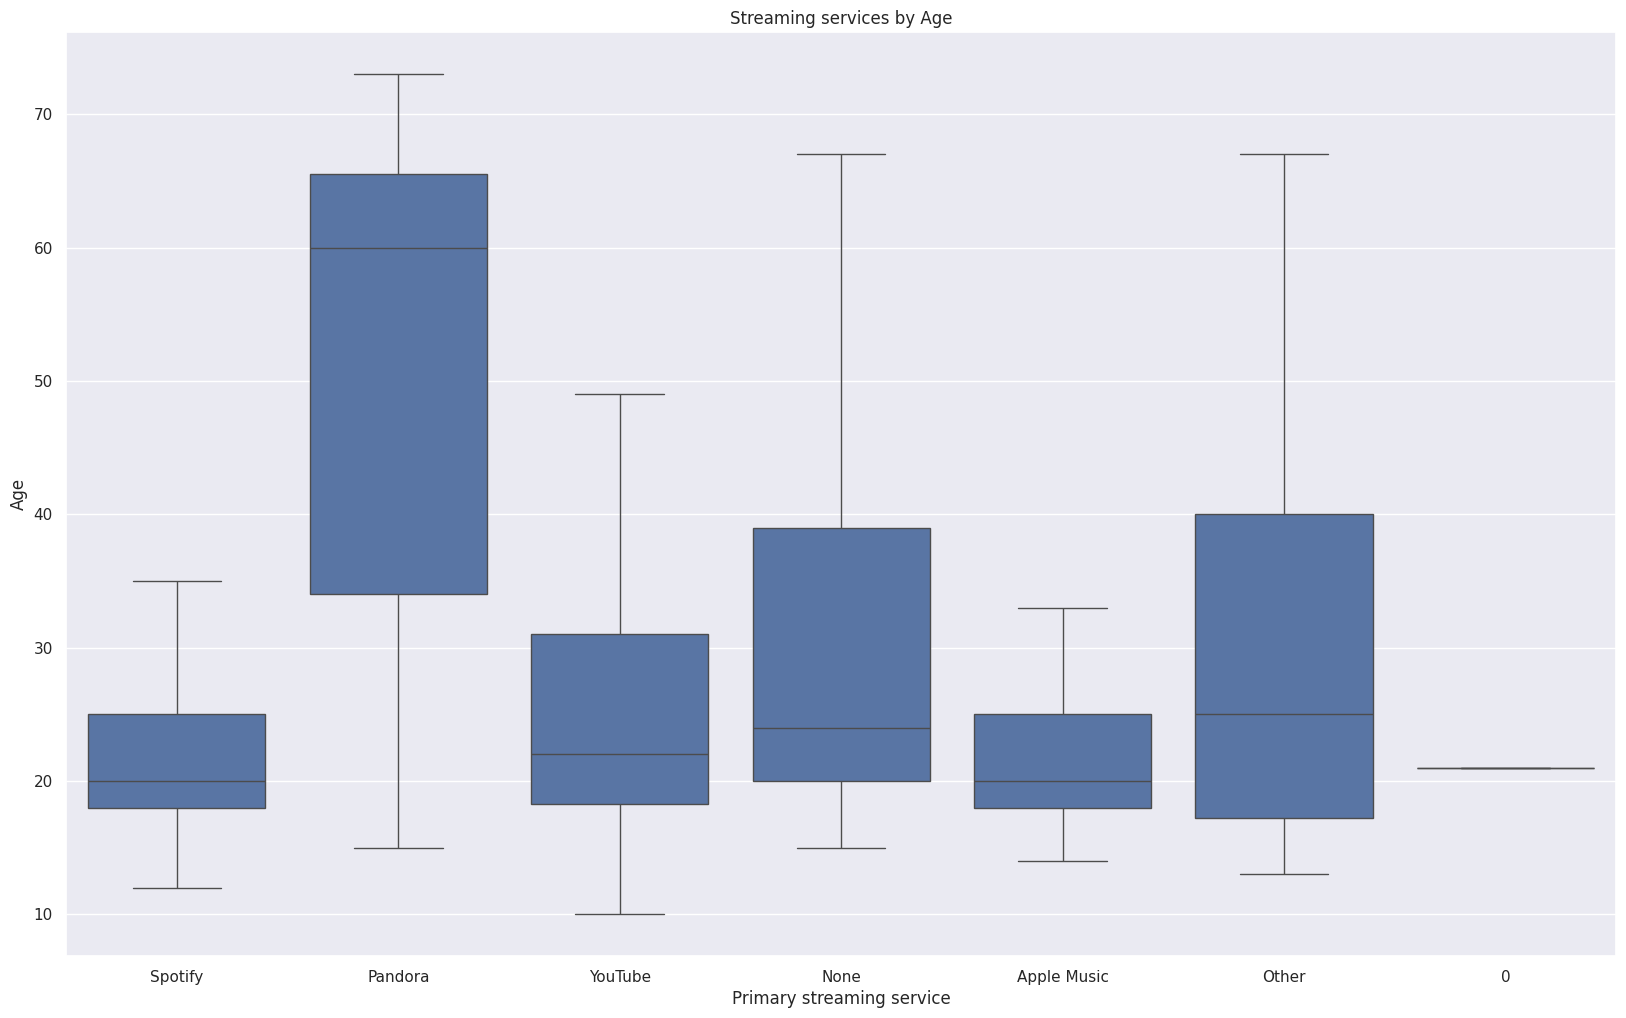

In [32]:

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False,)

plt.title('Streaming services by Age')

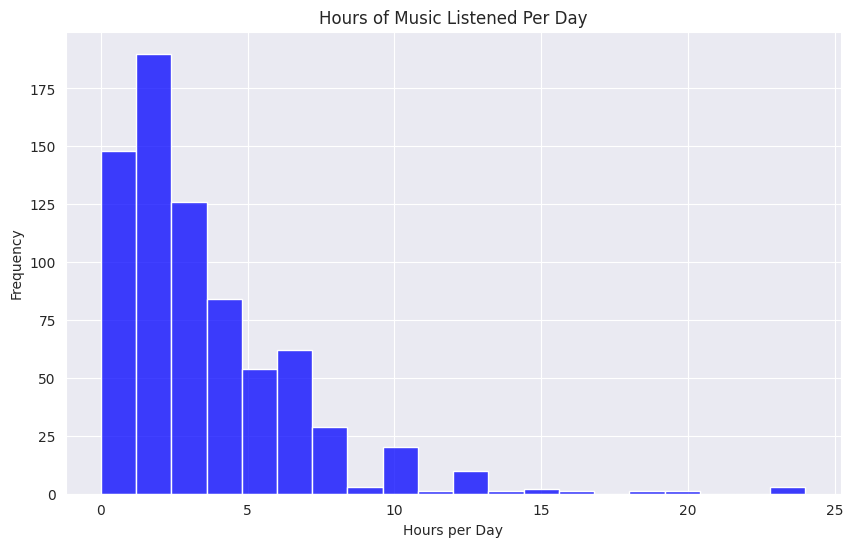

In [13]:

# Plot 5: Hours Listened
plt.figure(figsize=(10, 6))
sns.histplot(df['Hours per day'], bins=20, color='blue')
plt.title('Hours of Music Listened Per Day')
plt.xlabel('Hours per Day')
plt.ylabel('Frequency')
plt.show()

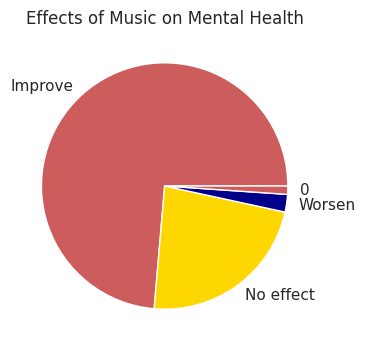

In [33]:

plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = df['Music effects'].value_counts()
effects.plot(kind='pie', colors = ["indianred", "gold", "darkblue"], ylabel= '');



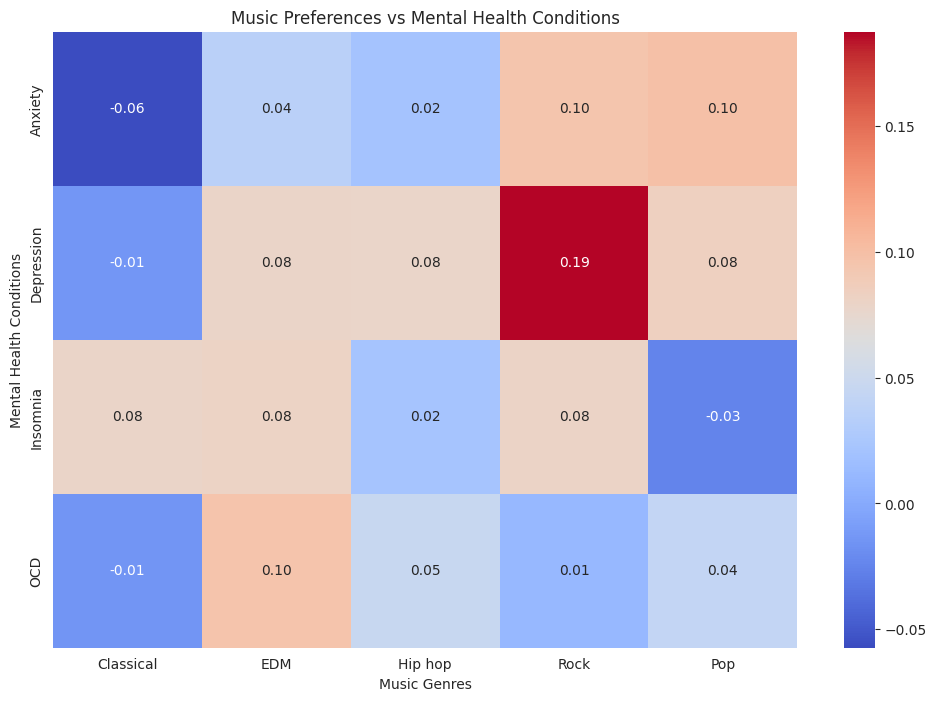

In [14]:

# Plot 4: Mental Health and Genre Preference Heatmap
plt.figure(figsize=(12, 8))
heatmap_data = df[mental_health_conditions + genres].corr().loc[mental_health_conditions, genres]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Music Preferences vs Mental Health Conditions')
plt.xlabel('Music Genres')
plt.ylabel('Mental Health Conditions')
plt.show()

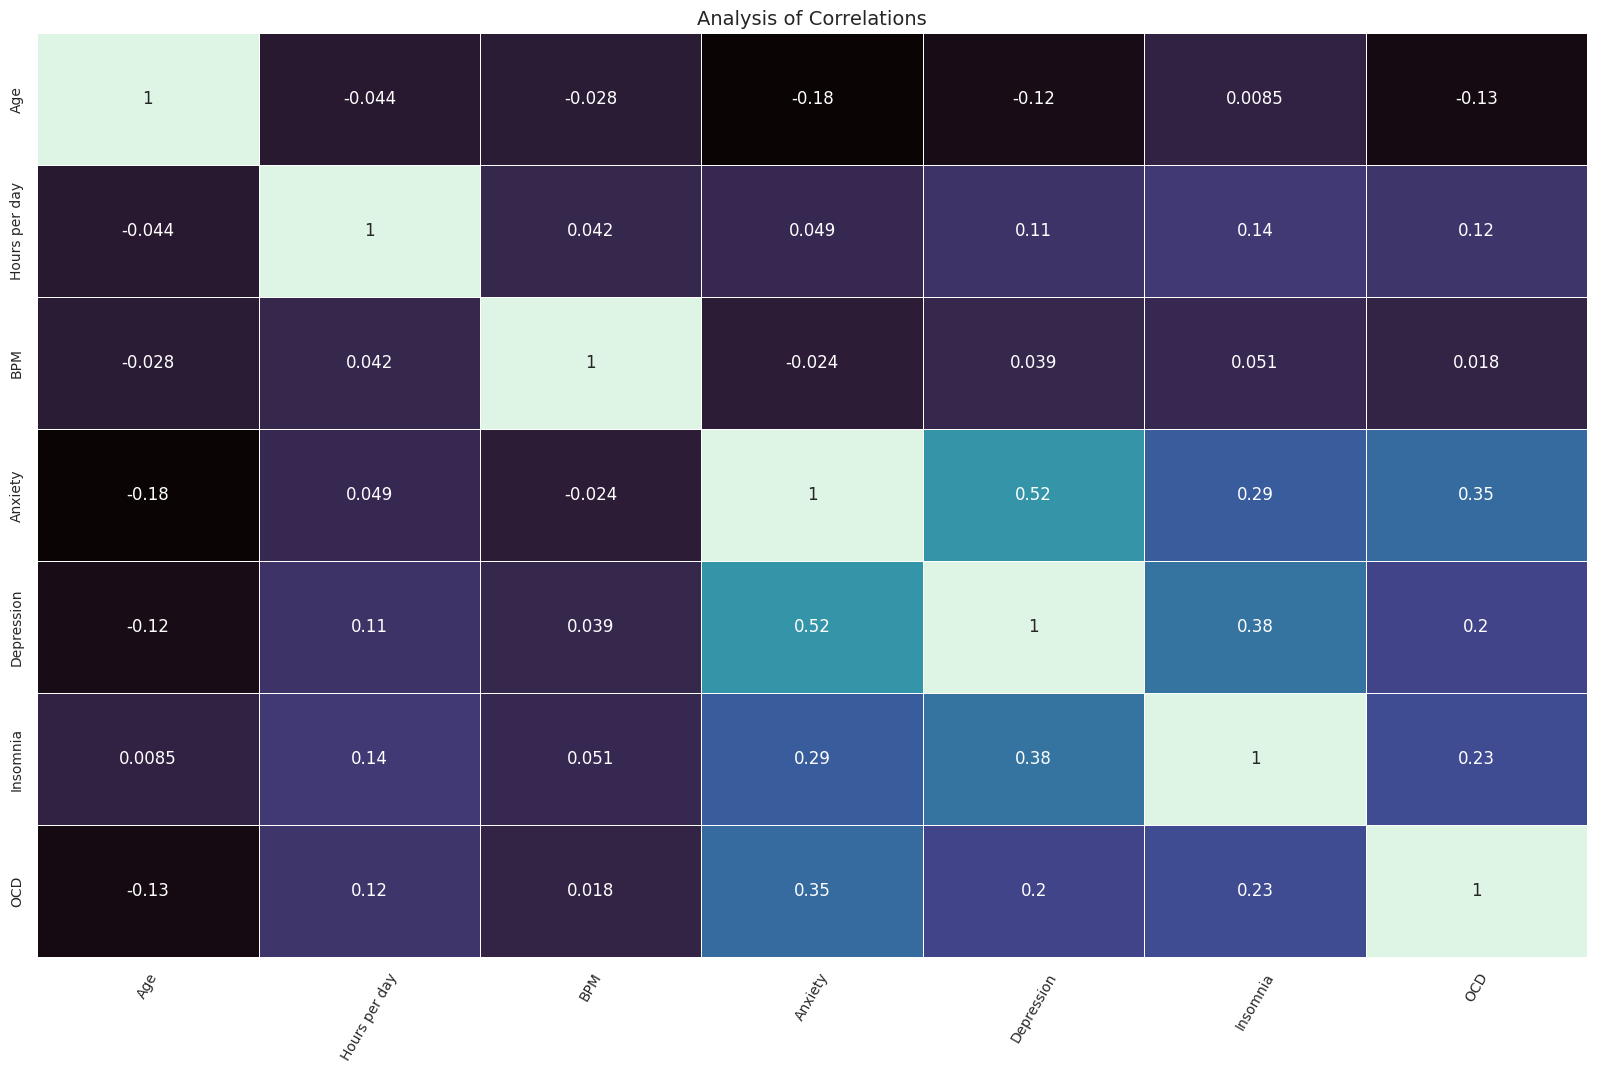

In [22]:
# Plot 5: Correlation map
df1 = ['Age','Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']
df[df1].corr().T.style.background_gradient(cmap='mako', axis=1)

def correlated_map(dataframe, plot=False):
    corr = df[df1].corr()
    if plot:
        sns.set(rc={'figure.figsize': (20, 12)})
        sns.heatmap(corr, cmap="mako", annot=True, linewidths=.6 , cbar = False)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Analysis of Correlations', size=14)
        plt.show()
correlated_map(df, plot=True)

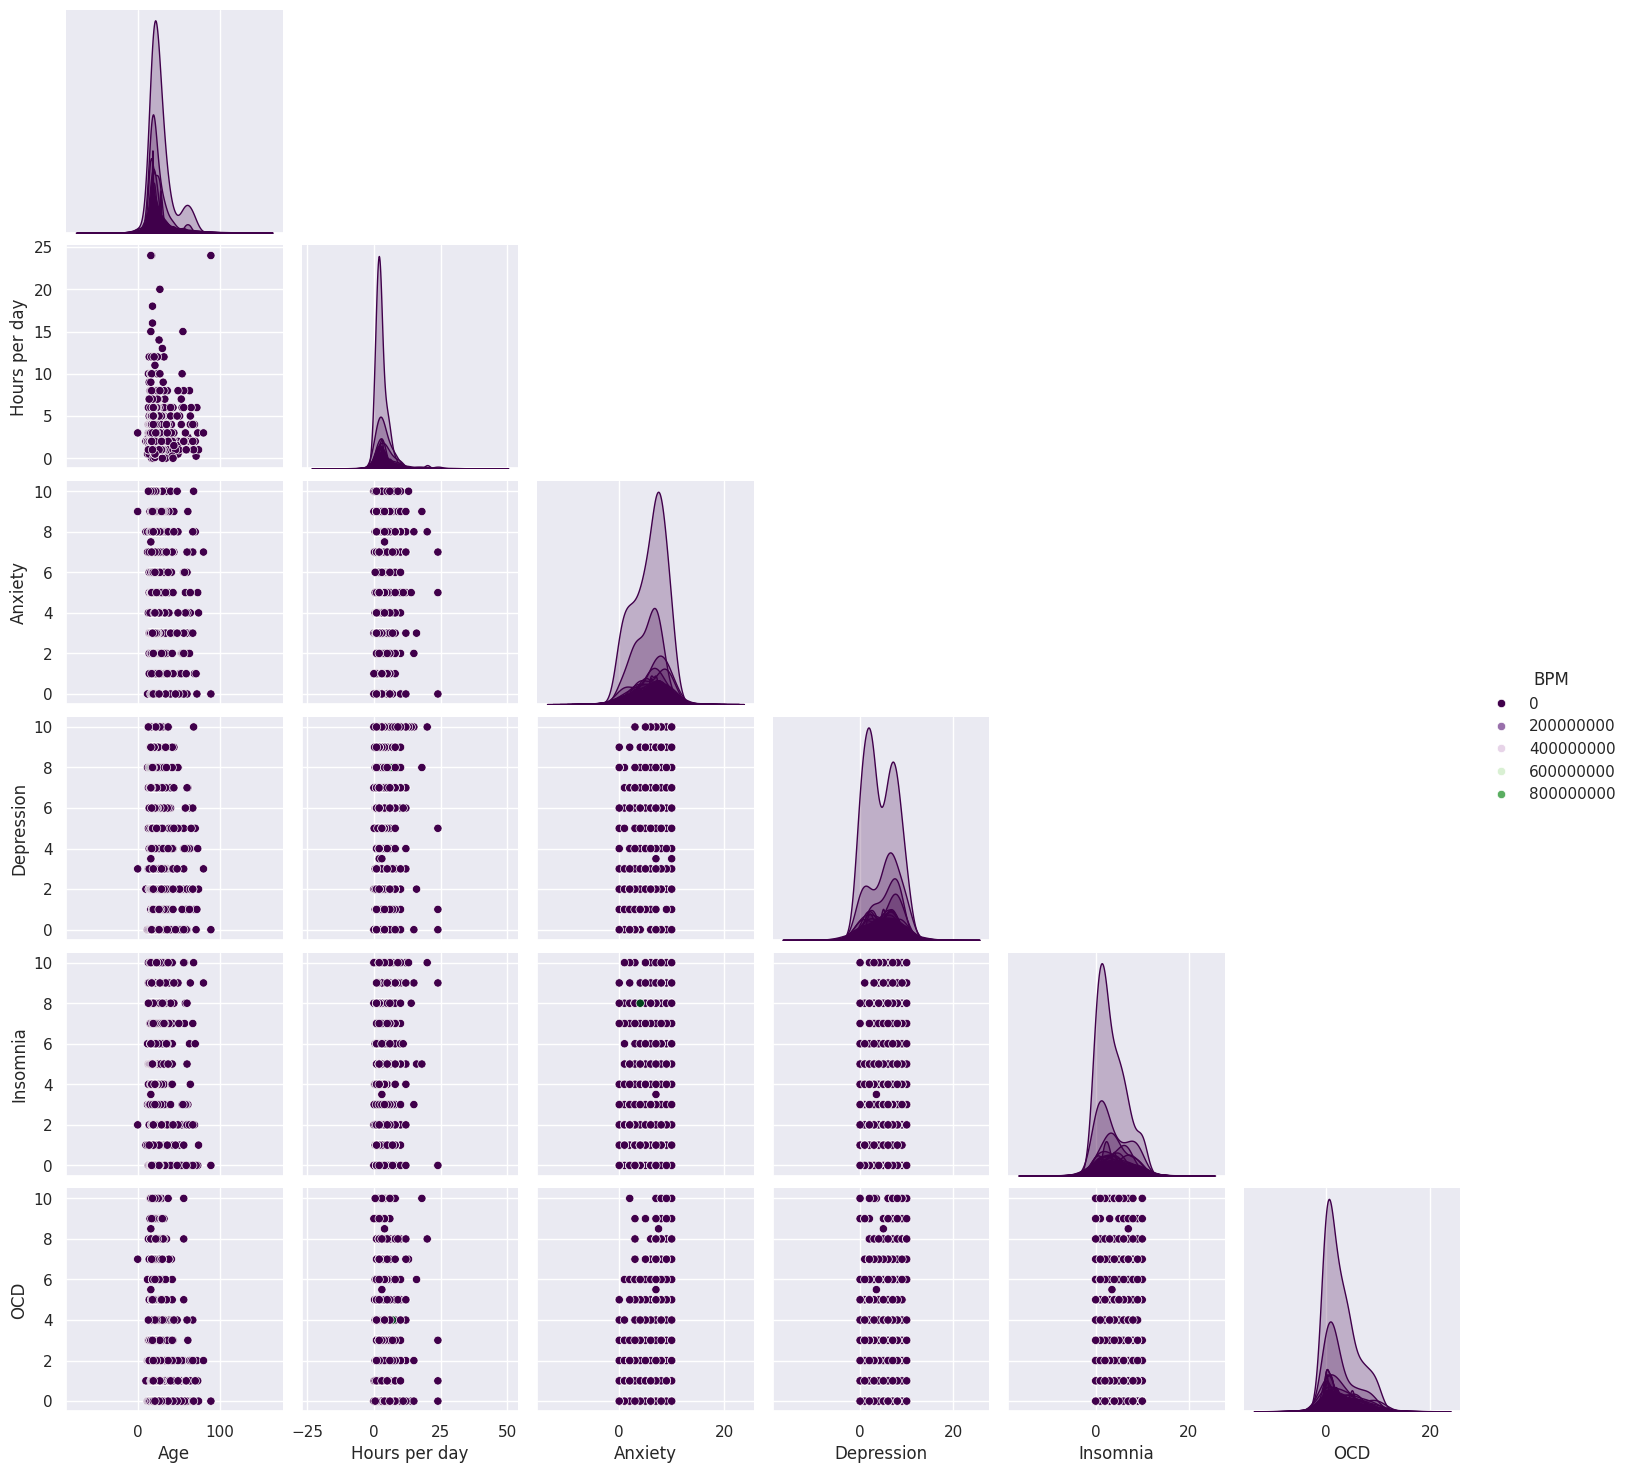

In [23]:
sns.pairplot(data=df[df1], diag_kind='kde',hue="BPM",palette='PRGn',corner=True)
plt.show()

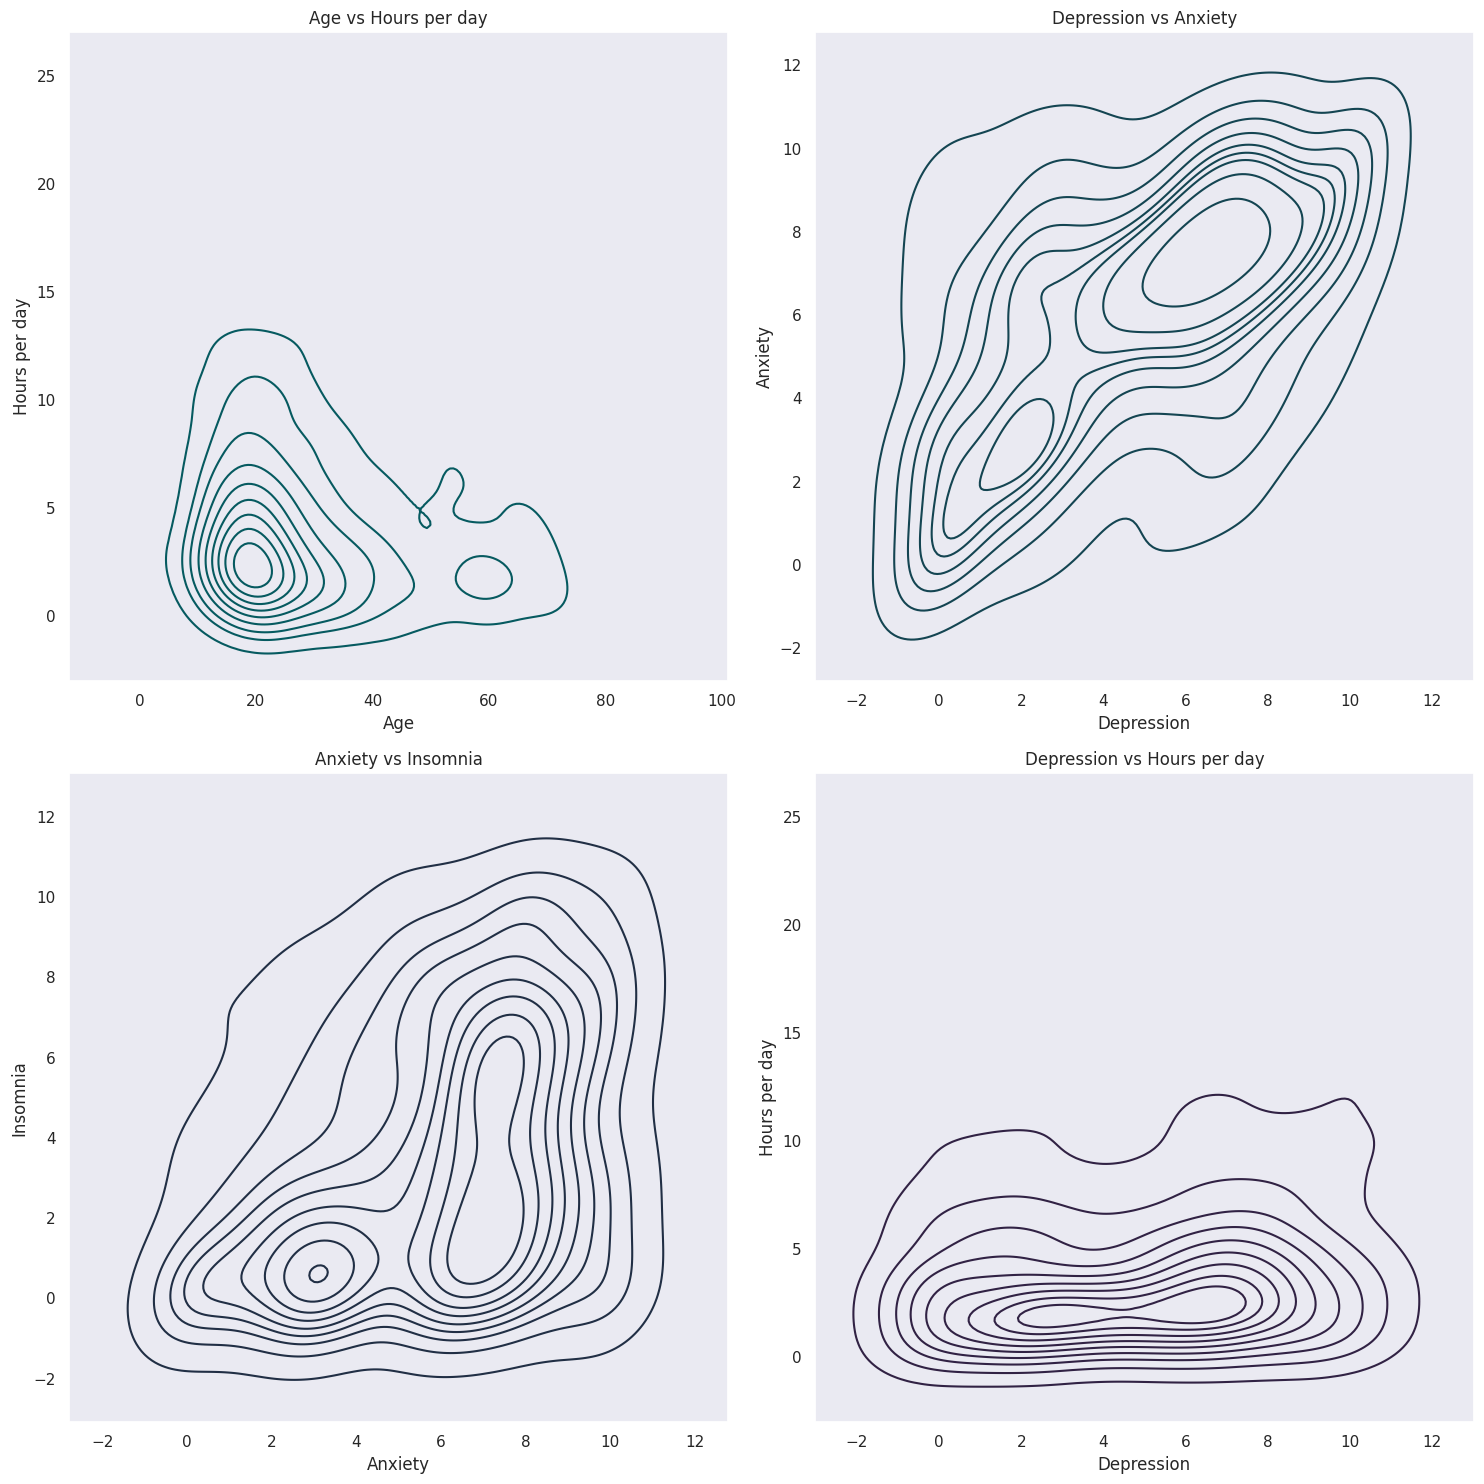

In [25]:


fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.kdeplot(x='Age', y='Hours per day', data=df, ax=axs[0, 0], color='#065A60')
axs[0, 0].set_title('Age vs Hours per day')
axs[0, 0].grid()
sns.kdeplot(x='Depression', y='Anxiety', data=df, ax=axs[0, 1], color='#144552')
axs[0, 1].set_title('Depression vs Anxiety')
axs[0, 1].grid()
sns.kdeplot(x='Anxiety', y='Insomnia', data=df, ax=axs[1, 0], color='#212F45')
axs[1, 0].set_title('Anxiety vs Insomnia')
axs[1, 0].grid()
sns.kdeplot(x='Depression', y='Hours per day', data=df, ax=axs[1, 1], color='#312244')
axs[1, 1].set_title('Depression vs Hours per day')
axs[1, 1].grid()
plt.tight_layout()
plt.show()



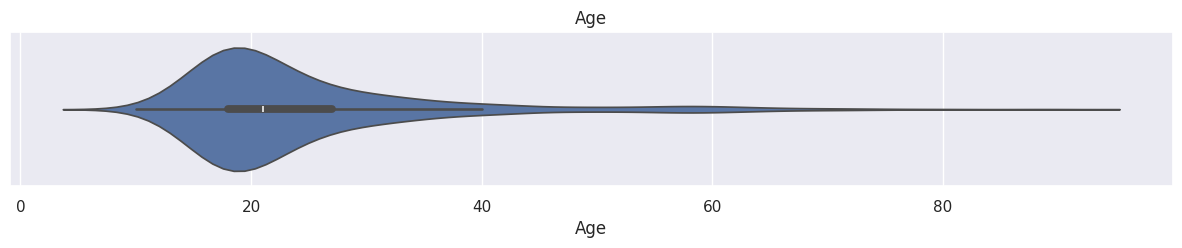

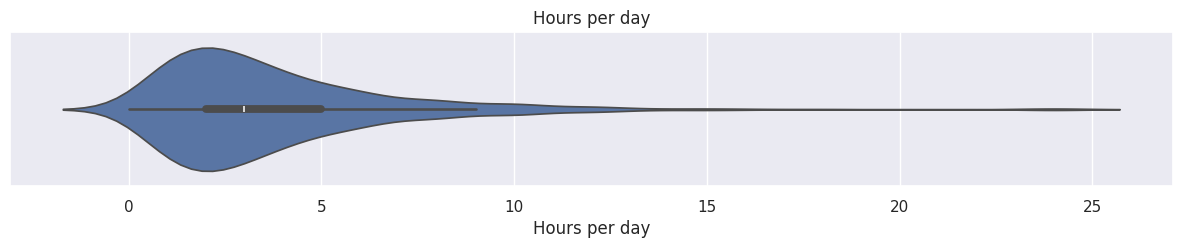

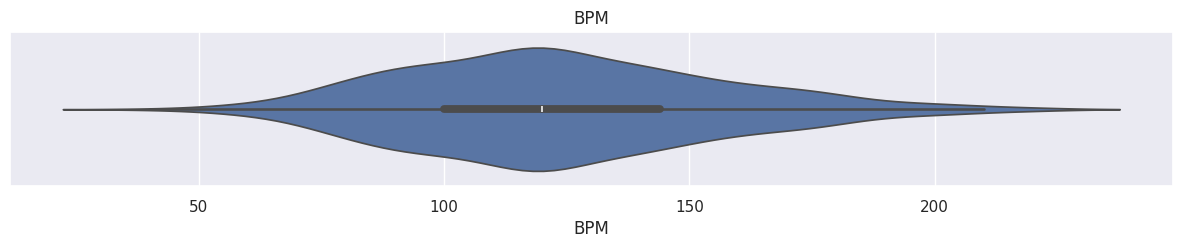

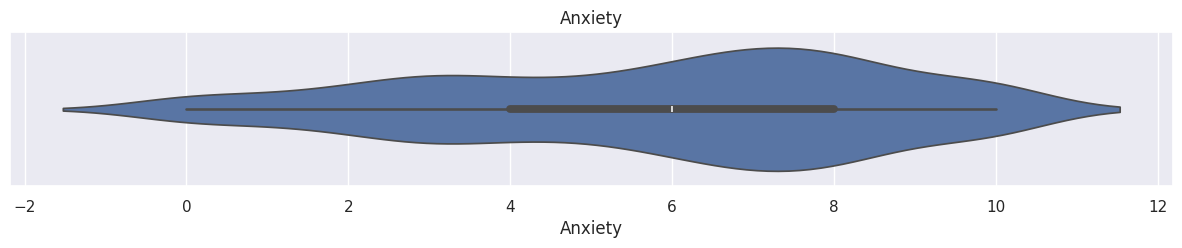

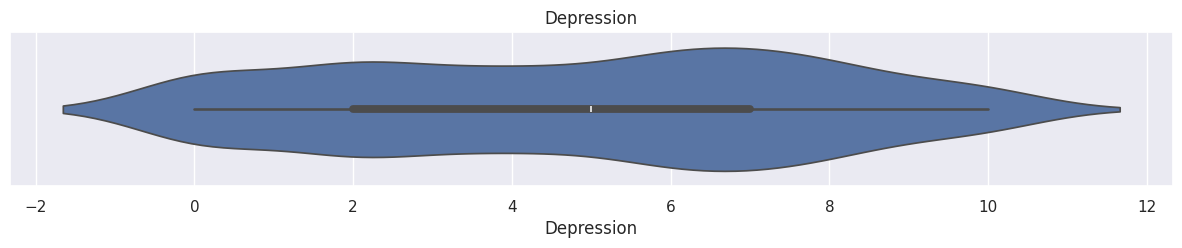

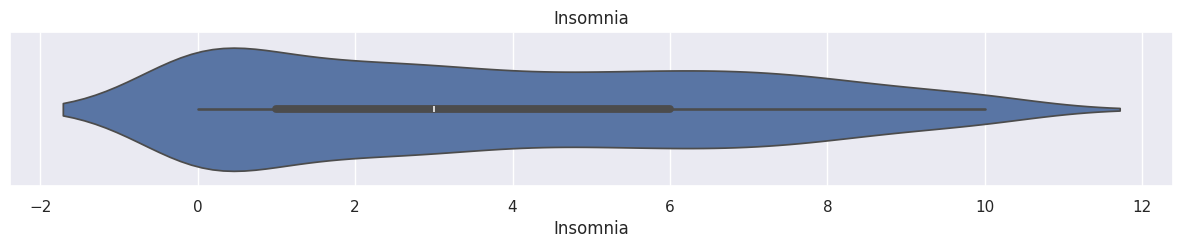

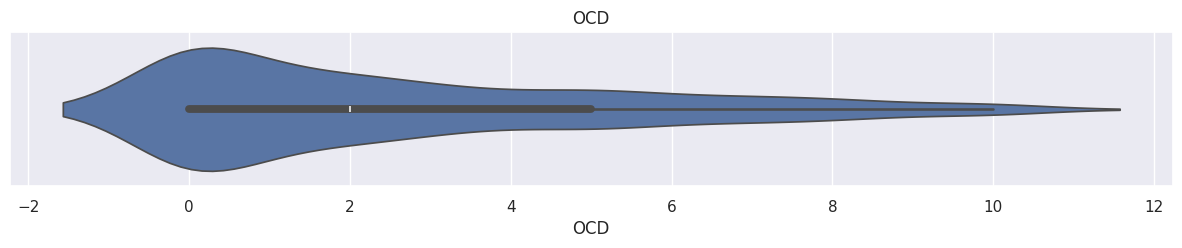

In [39]:
columns1 = ['Age','Hours per day','BPM','Anxiety','Depression','Insomnia','OCD']
for column in columns1:
    plt.figure(figsize=(15,2))
    sns.violinplot(x=df[column])
    plt.title(column)
    plt.show()

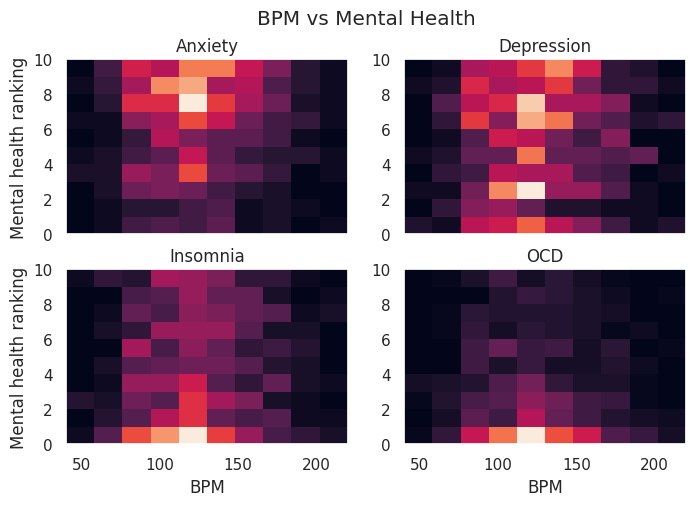

In [38]:
fig = plt.figure(figsize=(8, 5))

plt.suptitle("BPM vs Mental Health")

y = df["Anxiety"]
y2 = df["Depression"]
y3 = df["Insomnia"]
y4 = df["OCD"]
x = df["BPM"]

ax = fig.add_subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x,y, density = True);


ax = fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x,y2, density = True);

ax = fig.add_subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x,y3, density = True);

ax = fig.add_subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x,y4, density = True);
